In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np
import scipy.stats as stats

## Load Data & Update Labels

In [2]:
df_carbon_abund = pd.read_excel(
    "../data/processed/CascadiaMargin_carbon_abundance.xlsx"
)
df_index_vals = pd.read_excel("../data/processed/CascadiaMargin_index_values.xlsx")
df_glyc = pd.read_excel("../data/processed/CascadiaMargin_glyc_degrad_prod.xlsx")

In [3]:
df_carbon_abund["Location"] = df_carbon_abund["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur cyn": "McArthur Canyon"}
)

df_index_vals["Location"] = df_index_vals["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur Cyn": "McArthur Canyon"}
)

df_glyc["Location"] = df_glyc["Location"].replace(
    {"Astoria Cyn": "Astoria Canyon", "Mcarthur Cyn": "McArthur Canyon"}
)

## Merge Datasets & Filter

In [4]:
from functools import reduce

# Assume df1, df2, df3, ... are your DataFrames and you want to merge them all on 'Sample Name'
dataframes = [
    df_carbon_abund,
    df_index_vals,
    df_glyc,
]  # Add all your dataframes to this list


# Function to merge two dataframes with specified parameters
def merge_dfs(left, right):
    return pd.merge(left, right, on="Sample Name", how="outer")


# Use reduce to apply the merge function across all dataframes in the list
merge = reduce(merge_dfs, dataframes)
all_merge = merge[:-5]  # drop duplicate last 5 rows

In [5]:
# define DF to identify low size and purity score samples
low_purity_data = all_merge[all_merge["purity_score"] < 0.85]
low_size = all_merge[all_merge["avg_ugC"] < 0.90]

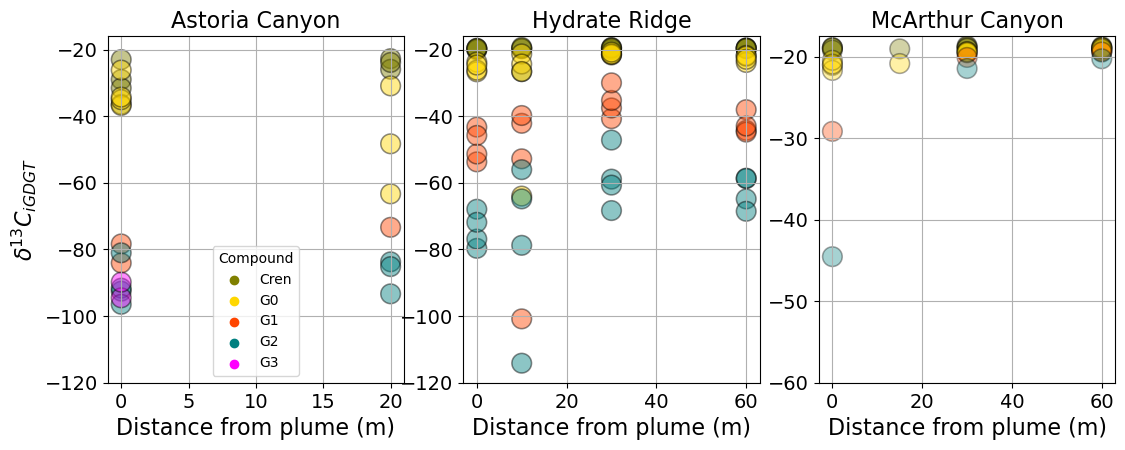

In [6]:
# filter for just compoounds with d13C measurements
df_carbon_abund = df_carbon_abund.dropna()
# sort by compound
df_carbon_abund = df_carbon_abund.sort_values("Compound")

# plot
fig, ax = plt.subplots(1, 3, figsize=(13, 4.5), facecolor="white")
ax = ax.flatten()

palette = ["olive", "gold", "orangered", "teal", "fuchsia"]
palette_o = ["olive", "gold", "orangered", "teal"]

sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "Astoria Canyon"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette,
    s=200,
    alpha=0.45,
    edgecolor="k",
    ax=ax[0],
    hue="Compound",
)

sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "Hydrate Ridge"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette_o,
    s=200,
    alpha=0.45,
    edgecolor="k",
    ax=ax[1],
    legend=False,
    hue="Compound",
)


sns.scatterplot(
    data=df_carbon_abund[df_carbon_abund["Location"] == "McArthur Canyon"],
    x="m_from_plume",
    y="d13c_avg",
    palette=palette_o,
    s=200,
    alpha=0.35,
    edgecolor="k",
    ax=ax[2],
    legend=False,
    hue="Compound",
)

titles = ["Astoria Canyon", "Hydrate Ridge", "McArthur Canyon"]
for i, j in enumerate(titles):
    ax[i].set_title(j, fontsize=16)
    ax[i].set_ylabel("$\delta$$^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_xlabel("Distance from plume (m)", fontsize=16)
    ax[i].grid("on")
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    ax[i].yaxis.set_major_locator(MultipleLocator(20))
    # ax[i].set_ylim([-120,-15])
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
ax[0].set_ylim([-120, -16])
ax[1].set_ylim([-120, -16])
ax[2].set_ylim([-60, -17.5])
ax[2].yaxis.set_major_locator(MultipleLocator(10))

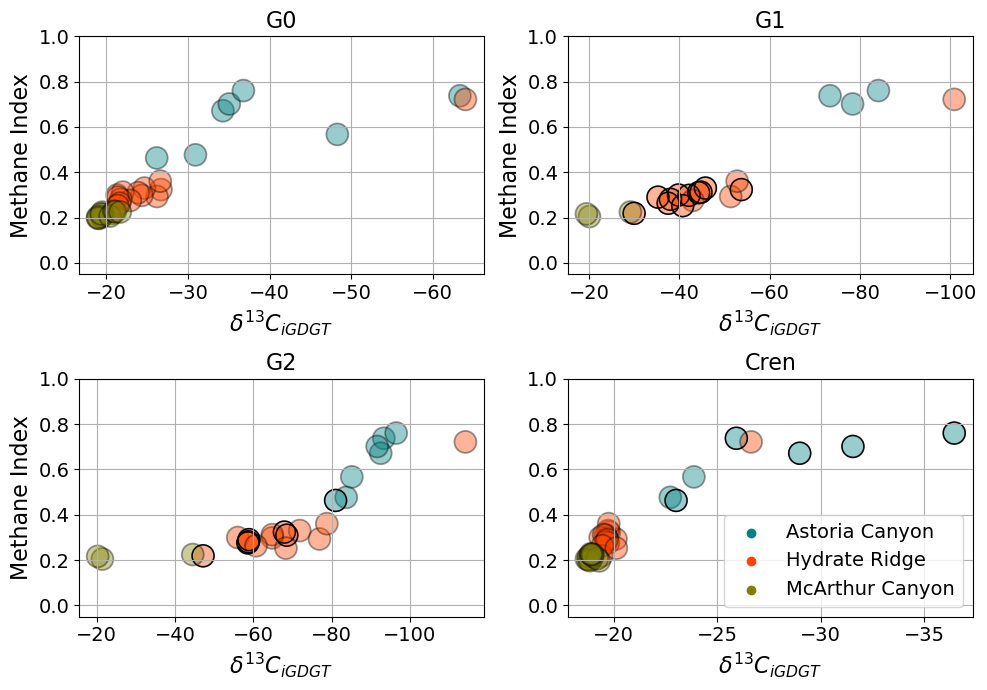

In [7]:
# Figure 3
gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 7), facecolor="white")
pal_2 = ["teal", "orangered", "olive"]
ax = ax.flatten()

for i, j in enumerate(gdgts):

    sns.scatterplot(
        data=all_merge[all_merge["Compound"] == j],
        x="d13c_avg",
        y="MI index",
        hue="Location_x",
        ax=ax[i],
        palette=pal_2,
        s=250,
        edgecolor="k",
        alpha=0.4,
    )

    # Filter the dataframe for each compound
    data = low_size[low_size["Compound"] == j]
    data_2 = low_purity_data[low_purity_data["Compound"] == j]
    locations = data["Location_x"].unique()

    # Plot each location separately to control edge and face colors
    for location in locations:
        subset = data[data["Location_x"] == location]
        ax[i].scatter(
            subset["d13c_avg"],
            subset["MI index"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )
    for location in locations:
        subset2 = data_2[data_2["Location_x"] == location]
        ax[i].scatter(
            subset2["d13c_avg"],
            subset2["MI index"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )

    # Additional customization for each subplot as needed
    ax[i].set_title(f"Compound: {j}")
    ax[i].set_xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_ylabel("Methane Index", fontsize=16)
    ax[i].invert_xaxis()
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    # ax[i].set_xlim([-120,-15])
    ax[i].set_ylim([-0.05, 1])
    ax[i].grid("on")


title = ["G0", "G1", "G2", "Cren"]
for k, l in enumerate(title):
    ax[k].set_title(l, fontsize=16)
    ax[0].legend().remove()
    ax[2].legend().remove()
    ax[1].legend().remove()
ax[3].set_ylabel(None)
ax[3].legend(fontsize=14)
plt.tight_layout()
plt.savefig("../manuscript-figures/MI_vs_d13C.png", dpi=400)

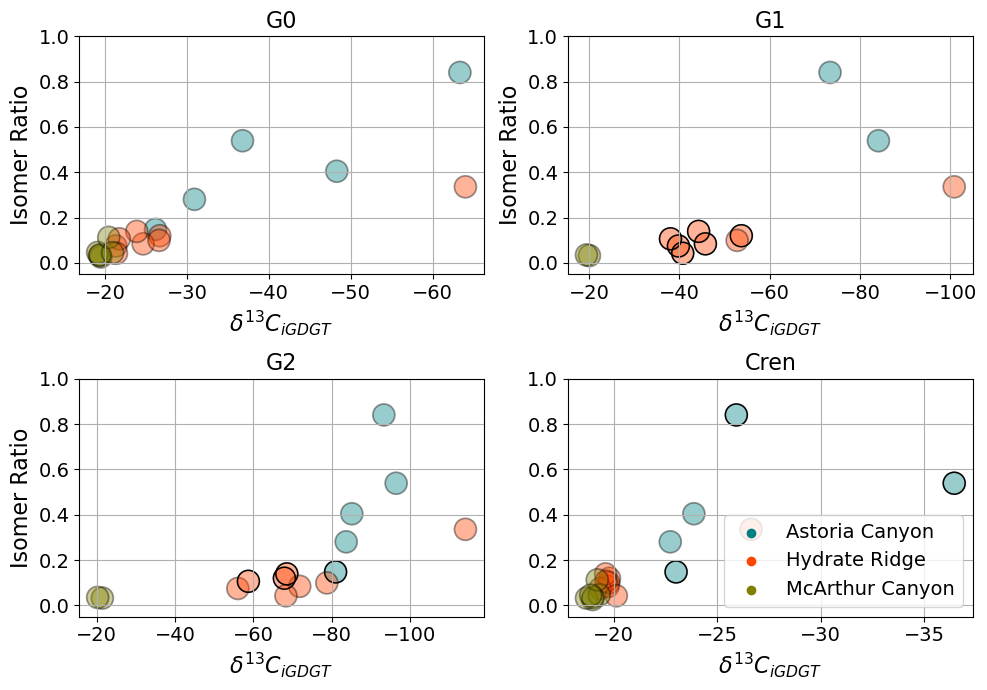

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd
import numpy as np


gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 7), facecolor="white")
pal_2 = ["teal", "orangered", "olive"]
ax = ax.flatten()

for i, j in enumerate(gdgts):

    sns.scatterplot(
        data=all_merge[all_merge["Compound"] == j],
        x="d13c_avg",
        y="ratio",
        hue="Location_x",
        ax=ax[i],
        palette=pal_2,
        s=250,
        edgecolor="k",
        alpha=0.4,
    )
    # Filter the dataframe for each compound
    data = low_size[low_size["Compound"] == j]
    data_2 = low_purity_data[low_purity_data["Compound"] == j]
    locations = data["Location_x"].unique()

    # Plot each location separately to control edge and face colors
    for location in locations:
        subset = data[data["Location_x"] == location]
        ax[i].scatter(
            subset["d13c_avg"],
            subset["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )
    for location in locations:
        subset2 = data_2[data_2["Location_x"] == location]
        ax[i].scatter(
            subset2["d13c_avg"],
            subset2["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )

    # Additional customization for each subplot as needed
    ax[i].set_title(f"Compound: {j}")
    ax[i].set_xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_ylabel("Isomer Ratio", fontsize=16)
    ax[i].invert_xaxis()
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    # ax[i].set_xlim([-120,-15])
    ax[i].set_ylim([-0.05, 1])
    ax[i].grid("on")

title = ["G0", "G1", "G2", "Cren"]
for k, l in enumerate(title):
    ax[k].set_title(l, fontsize=16)
    ax[0].legend().remove()
    ax[2].legend().remove()
    ax[1].legend().remove()
ax[3].set_ylabel(None)
ax[3].legend(fontsize=14)
plt.tight_layout()


In [193]:
all_merge_2 = all_merge.dropna()

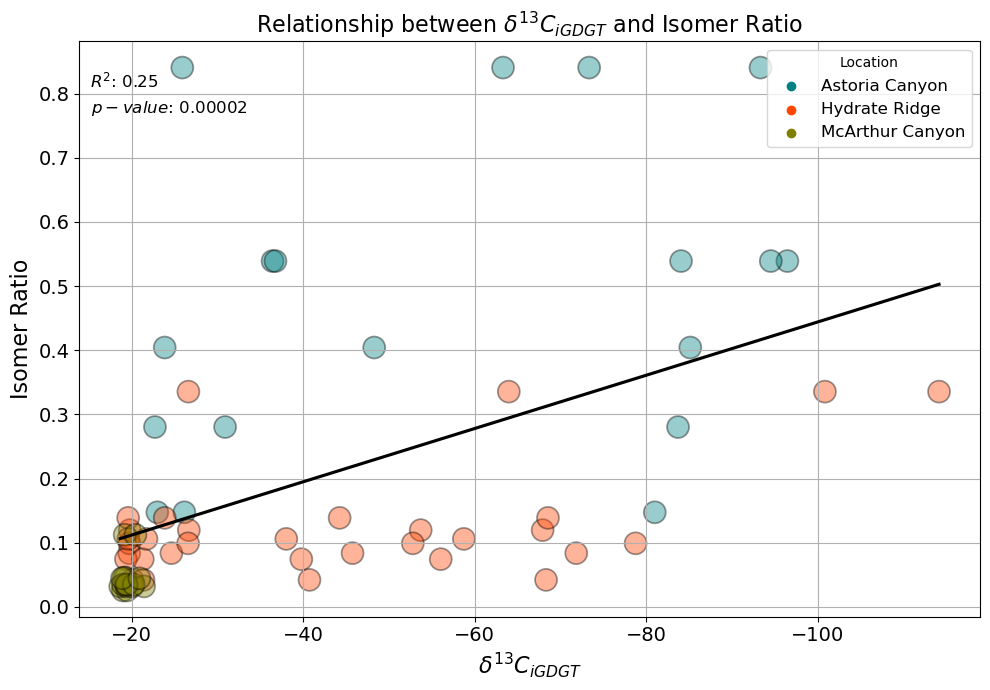

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd

# Define the colors for different locations
pal_2 = ["teal", "orangered", "olive"]

# Create the scatter plot
plt.figure(figsize=(10, 7), facecolor="white")

sns.scatterplot(
    data=all_merge_2,
    x="d13c_avg",
    y="ratio",
    hue="Location_x",
    palette=pal_2,
    s=250,
    edgecolor="k",
    alpha=0.4,
)

# Add linear regression line using sns.regplot
sns.regplot(
    data=all_merge_2,
    x="d13c_avg",
    y="ratio",
    scatter=False,
    line_kws={"color": "black"},
    ci=None
)

# Calculate and annotate correlation coefficient
x = all_merge_2["d13c_avg"]
y = all_merge_2["ratio"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
plt.annotate(f'$R^2$: {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             ha='center', va='top', fontsize=12, color='black')
plt.annotate(f'$p-value$: {p_value:.5f}', xy=(0.1, 0.9), xycoords='axes fraction', 
             ha='center', va='top', fontsize=12, color='black')

# Customize plot
plt.title("Relationship between $\delta^{13}C_{iGDGT}$ and Isomer Ratio", fontsize=16)
plt.xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
plt.ylabel("Isomer Ratio", fontsize=16)
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend(title='Location', fontsize=12)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)

# Save and show the plot
plt.tight_layout()
plt.savefig("../manuscript-figures/ratio_vs_d13C_single_plot.png", dpi=400)
plt.show()


In [201]:
all_merge_2

,Sample Name,Location_x,Compound,m_from_plume_x,depth_int,avg_ugC,F2/F1,d13c_avg,stdev,purity_score,...,m_from_plume_y,TEX86-corr,Uk'37,MI index,50th_percentile,delta_sst,bayspar_preds,Location,m_from_plume,ratio
0,S1,Astoria Canyon,Cren,20.0,0-1,2.150000,9.880000,-22.730000,0.240000,0.850000,...,0.0,0.677206,0.482523,0.476755,25.1151,12.1151,0.341786,Astoria Canyon,0.0,0.280325
1,S1,Astoria Canyon,G0,20.0,0-1,1.560000,12.830000,-30.910000,0.100000,0.950000,...,0.0,0.677206,0.482523,0.476755,25.1151,12.1151,0.341786,Astoria Canyon,0.0,0.280325
3,S1,Astoria Canyon,G2,20.0,0-1,1.080000,8.740000,-83.710000,0.270000,1.000000,...,0.0,0.677206,0.482523,0.476755,25.1151,12.1151,0.341786,Astoria Canyon,0.0,0.280325
14,S4,Astoria Canyon,Cren,20.0,3-4,1.460000,6.890000,-23.870000,0.060000,0.900000,...,0.0,0.631857,0.430819,0.567007,22.1357,9.1357,0.352747,Astoria Canyon,0.0,0.404239
15,S4,Astoria Canyon,G0,20.0,3-4,1.990000,33.260000,-48.290000,0.220000,0.920000,...,0.0,0.631857,0.430819,0.567007,22.1357,9.1357,0.352747,Astoria Canyon,0.0,0.404239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,S107,McArthur Canyon,G2,60.0,4-6,2.556417,9.039124,-20.265874,0.139442,0.807558,...,60.0,0.446553,0.078031,0.215989,11.4661,1.5339,0.395558,McArthur Canyon,60.0,0.034764
231,S109,McArthur Canyon,Cren,0.0,0-1,6.718994,11.896565,-19.202246,0.111362,0.888585,...,0.0,0.468116,0.082745,0.206344,12.2648,0.7352,0.395936,McArthur Canyon,0.0,0.112344
232,S109,McArthur Canyon,G0,0.0,0-1,4.842722,35.343926,-20.456942,0.097072,0.966485,...,0.0,0.468116,0.082745,0.206344,12.2648,0.7352,0.395936,McArthur Canyon,0.0,0.112344
238,S111,McArthur Canyon,Cren,0.0,2-3,6.765851,21.766065,-18.887849,0.111301,0.926537,...,0.0,0.446382,0.089943,0.227496,11.3384,1.6616,0.396304,McArthur Canyon,0.0,0.044577


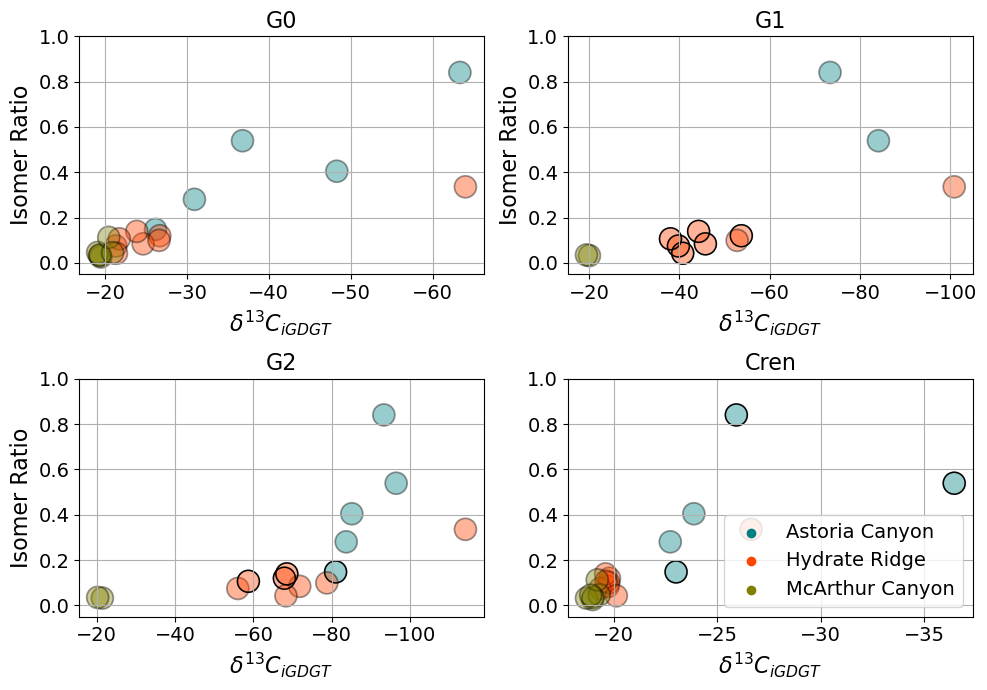

In [202]:
# Figure 4
from scipy.stats import linregress
gdgts = ["G0", "G1", "G2", "Cren"]
fig, ax = plt.subplots(2, 2, figsize=(10, 7), facecolor="white")
pal_2 = ["teal", "orangered", "olive"]
ax = ax.flatten()

for i, j in enumerate(gdgts):

    sns.scatterplot(
        data=all_merge_2[all_merge_2["Compound"] == j],
        x="d13c_avg",
        y="ratio",
        hue="Location_x",
        ax=ax[i],
        palette=pal_2,
        s=250,
        edgecolor="k",
        alpha=0.4,
    )

    # Filter the dataframe for each compound
    data = low_size[low_size["Compound"] == j]
    data_2 = low_purity_data[low_purity_data["Compound"] == j]
    locations = data["Location_x"].unique()

    # Plot each location separately to control edge and face colors
    for location in locations:
        subset = data[data["Location_x"] == location]
        ax[i].scatter(
            subset["d13c_avg"],
            subset["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )
    for location in locations:
        subset2 = data_2[data_2["Location_x"] == location]
        ax[i].scatter(
            subset2["d13c_avg"],
            subset2["ratio"],
            edgecolor="black",
            facecolor="none",
            s=250,
            alpha=1,
            linewidth=1,
        )

    # Additional customization for each subplot as needed
    ax[i].set_title(f"Compound: {j}")
    ax[i].set_xlabel("$\delta^{13}C_{iGDGT}$", fontsize=16)
    ax[i].set_ylabel("Isomer Ratio", fontsize=16)
    ax[i].invert_xaxis()
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    # ax[i].set_xlim([-120,-15])
    ax[i].set_ylim([-0.05, 1])
    ax[i].grid("on")


title = ["G0", "G1", "G2", "Cren"]
for k, l in enumerate(title):
    ax[k].set_title(l, fontsize=16)
    ax[0].legend().remove()
    ax[2].legend().remove()
    ax[1].legend().remove()
ax[3].set_ylabel(None)
ax[3].legend(fontsize=14)
plt.tight_layout()
# plt.savefig("../manuscript-figures/ratio_vs_d13C.png", dpi=400)

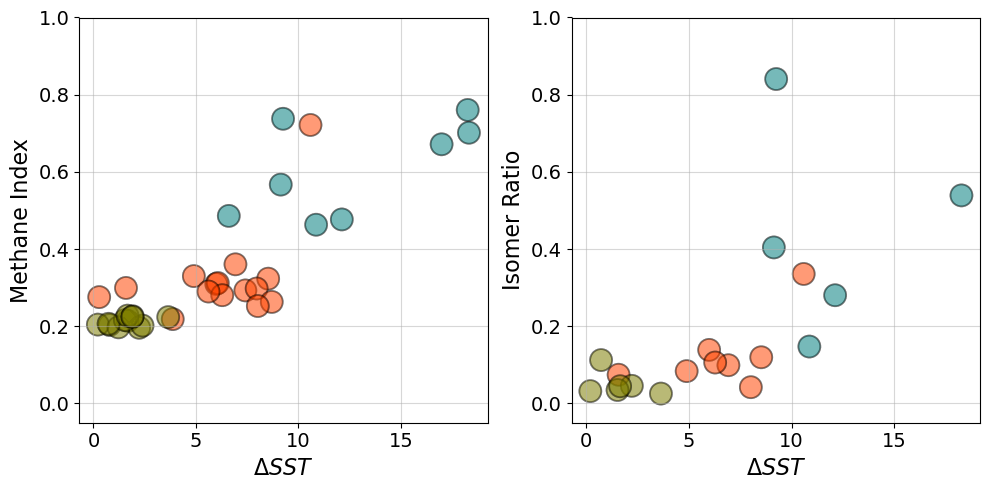

In [9]:
# Figure 5
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor="white")
ax = ax.flatten()
vals = ["MI index", "ratio"]

for i, j in enumerate(vals):
    sns.scatterplot(
        data=all_merge,
        x="delta_sst",
        hue="Location_x",
        y=j,
        ax=ax[i],
        palette=pal_2,
        edgecolor="k",
        alpha=0.1,
        s=250,
    )
    ax[i].tick_params(axis="x", labelsize=14)
    ax[i].tick_params(axis="y", labelsize=14)
    ax[i].set_ylim([-0.05, 1])

leg = [0, 1]
for k, l in enumerate(leg):
    ax[k].legend().remove()
    ax[k].set_xlabel("$\Delta SST$", fontsize=16)

# ax[0].axhline(y = 0.3)

ylabels = ["Methane Index", "Isomer Ratio"]
for n, m in enumerate(ylabels):
    ax[n].set_ylabel(m, fontsize=16)
    ax[n].grid("on", alpha=0.5)

plt.tight_layout()
plt.savefig("../manuscript-figures/SST_vs_ratio_MI.png", dpi=400)

In [216]:
# clculate percent error
# set true value to regional SST
true_value = 13
difference = true_value - df_index_vals["50th_percentile"]
abs_difference = abs(difference)
percent_error = abs_difference / true_value * 100
df_index_vals.loc[:, "Percent_Error"] = percent_error

In [225]:
# Set MI intervals
int = [0, 0.2,0.3, 0.40, 1]  
# int_labels = ["MI < 0.25", "0.25 < MI < 0.4", "MI > 0.4"] 
int_labels = [ "0 < MI < 0.2","0.2 < MI < 0.3", "0.3 < MI < 0.4", "MI > 0.4"] 

# Assign data to intervals
df_index_vals["MI_Index_int"] = pd.cut(
    df_index_vals["MI index"], bins=int, labels=int_labels, retbins=False
)

# Set MI intervals
int = [0, 0.2, 0.4, 0.60, 1]  
# int_labels = ["MI < 0.25", "0.25 < MI < 0.4", "MI > 0.4"] 
int_labels = [ "0 < Exo < 0.2","0.2 < Exo < 0.4", "0.4 < Exo < 0.6", "Exo > 0.6"] 

# Assign data to intervals
df_index_vals["benth_int"] = pd.cut(
    df_index_vals["benthic_cont"], bins=int, labels=int_labels, retbins=False
)

In [226]:
additional_stats_sst = (
    df_index_vals.groupby("MI_Index_int")["delta_sst"]
    .agg(["mean", "median", "std", "min", "max", "count"])
    .reset_index()
)
print(additional_stats_sst)
additional_stats_error = (
    df_index_vals.groupby("MI_Index_int")["Percent_Error"]
    .agg(["mean", "median", "std", "min", "max", "count"])
    .reset_index()
)
print(additional_stats_error)

     MI_Index_int       mean   median       std     min      max  count
0    0 < MI < 0.2   1.490600   1.2196  0.648181  1.0219   2.2303      3
1  0.2 < MI < 0.3   3.713575   2.1535  3.009065  0.2119   8.6973     20
2  0.3 < MI < 0.4   6.479900   6.0639  1.350462  4.8962   8.5233      5
3        MI > 0.4  12.456511  10.8620  4.333877  6.6011  18.3179      9
     MI_Index_int       mean     median        std        min         max  \
0    0 < MI < 0.2  11.466154   9.381538   4.986006   7.860769   17.156154   
1  0.2 < MI < 0.3  28.565962  16.565385  23.146652   1.630000   66.902308   
2  0.3 < MI < 0.4  49.845385  46.645385  10.388171  37.663077   65.563846   
3        MI > 0.4  95.819316  83.553846  33.337515  50.777692  140.906923   

   count  
0      3  
1     20  
2      5  
3      9  


/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_35960/1340289486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_index_vals.groupby("MI_Index_int")["delta_sst"]
/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_35960/1340289486.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_index_vals.groupby("MI_Index_int")["Percent_Error"]


In [227]:
# Calculate CI via bootstrapping (95%)
np.random.seed(10)  # set random seed for reproducible results


def bootstrap_ci(data, n_bootstraps=1000):
    """Return the bootstrapped confidence interval for the mean of the data."""
    bootstrapped_means = []
    for i in range(n_bootstraps):
        # Sample with replacement and calculate the mean
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))

    # Calculate the confidence interval bounds
    lower_bound = np.percentile(bootstrapped_means, 2.5)
    upper_bound = np.percentile(bootstrapped_means, 97.5)

    return lower_bound, upper_bound


# Group the data by MI_Index_int and apply the bootstrap function
ci_results = df_index_vals.groupby("MI_Index_int")["delta_sst"].apply(
    lambda x: bootstrap_ci(x, n_bootstraps=1000)
)
ci_results_error = df_index_vals.groupby("MI_Index_int")["Percent_Error"].apply(
    lambda x: bootstrap_ci(x, n_bootstraps=1000)
)

# Print the results
print(ci_results)
print(ci_results_error)

MI_Index_int
0 < MI < 0.2      (1.0219000000000005, 2.2302999999999997)
0.2 < MI < 0.3                     (2.468457, 5.001699625)
0.3 < MI < 0.4               (5.3632800000000005, 7.53954)
MI > 0.4           (9.946362777777777, 15.276636666666665)
Name: delta_sst, dtype: object
MI_Index_int
0 < MI < 0.2      (7.860769230769235, 17.156153846153842)
0.2 < MI < 0.3    (18.918400961538456, 38.47532692307693)
0.3 < MI < 0.4     (42.57901923076923, 57.99646153846154)
MI > 0.4          (75.41813461538462, 116.93145085470087)
Name: Percent_Error, dtype: object


/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_35960/3447901107.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ci_results = df_index_vals.groupby("MI_Index_int")["delta_sst"].apply(
/var/folders/13/217c9md10ldcbnl1vbd8_hnr0000gn/T/ipykernel_35960/3447901107.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ci_results_error = df_index_vals.groupby("MI_Index_int")["Percent_Error"].apply(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


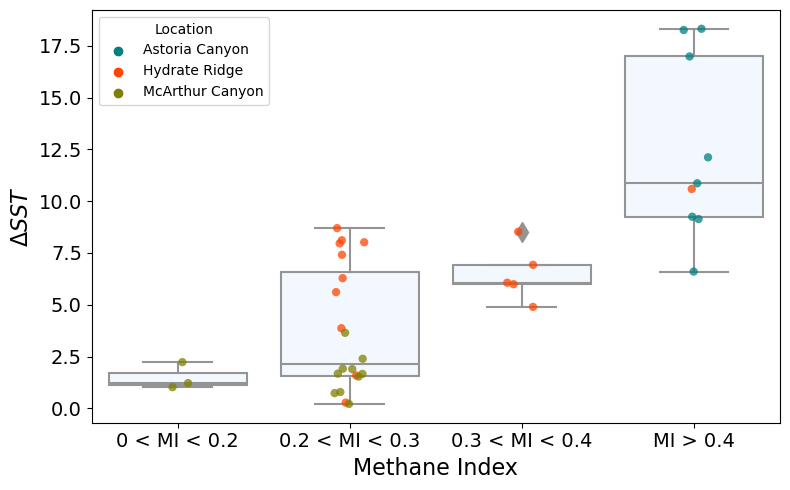

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
ax1 = ax

sns.boxplot(
    x="MI_Index_int",
    y="delta_sst",
    data=df_index_vals,
    color="aliceblue",
    fliersize=10,
    ax=ax1,
)

sns.stripplot(
    x="MI_Index_int",
    y="delta_sst",
    hue="Location",
    data=df_index_vals,
    palette=["teal", "orangered", "olive"],
    edgecolor="k",
    size=6,
    alpha=0.75,
    jitter=True,
    ax=ax1
)

# Setting the labels and titles
ax1.set_xlabel("Methane Index", fontsize=16)
ax1.set_ylabel("$\Delta SST$", fontsize=16)
# ax1_twin.set_ylabel("Percent Error", fontsize=14, rotation=270, labelpad=15)
ax1.tick_params(axis="x", labelsize=14)
# ax1_twin.tick_params(axis="y", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

plt.tight_layout()
plt.savefig("../manuscript-figures/MI_box_plot.png", dpi=400)